# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the file and read the data

In [2]:
data = pd.read_csv("/kaggle/input/gtd/globalterrorismdb_0718dist.csv", encoding="latin1")
data.head()

/tmp/ipykernel_20/121053546.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/kaggle/input/gtd/globalterrorismdb_0718dist.csv", encoding="latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Perform EDA

- Understand the Dataset: Start by gaining a high-level understanding of the dataset. Look at the dataset's structure, the number of rows and columns, and the data types of each column. This step helps you get familiar with the data you'll be working with.

- Handle Missing Data: Identify missing values in the dataset and decide how to handle them. Depending on the amount and nature of missing data, you can choose to drop rows or columns with missing values, impute missing values with suitable methods, or keep missing values as a separate category if applicable.

- Deal with Duplicates: Check for duplicate records in the dataset. If duplicates exist, decide whether to remove them or handle them based on the specific analysis requirements.

- Examine Descriptive Statistics: Calculate descriptive statistics for numerical variables such as mean, median, standard deviation, minimum, and maximum values. This step provides a summary of the central tendency and spread of the data.

- Visualize the Data: Use various plots and charts to visualize the data and identify patterns, trends, or outliers. Some commonly used visualizations include histograms, scatter plots, bar charts, box plots, and correlation matrices.

In [3]:
# check for the column names
columns = list(data.columns)

In [4]:
#Renaming the columns for ease of using them later
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

In [5]:
#getting only the columns to be used
data = data[['Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded','Target',
            'Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [6]:
# check rows and columns
data.shape

(181691, 19)

In [7]:
# check for the null values
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
state             421
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [8]:
# dropping all null values and saving it to another variable
data2 = data.dropna(axis=0)

In [9]:
# again checking shape for confirmation
data2.shape

(46556, 19)

In [10]:
# again checking null values for confirmation
data2.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
state          0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

In [11]:
# the summary of the data
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46556 entries, 5 to 181683
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         46556 non-null  int64  
 1   Month        46556 non-null  int64  
 2   Day          46556 non-null  int64  
 3   Country      46556 non-null  object 
 4   Region       46556 non-null  object 
 5   state        46556 non-null  object 
 6   city         46556 non-null  object 
 7   latitude     46556 non-null  float64
 8   longitude    46556 non-null  float64
 9   AttackType   46556 non-null  object 
 10  Killed       46556 non-null  float64
 11  Wounded      46556 non-null  float64
 12  Target       46556 non-null  object 
 13  Target       46556 non-null  object 
 14  Summary      46556 non-null  object 
 15  Group        46556 non-null  object 
 16  Target_type  46556 non-null  object 
 17  Weapon_type  46556 non-null  object 
 18  Motive       46556 non-null  object 
dtypes: 

In [12]:
# some information which shows us the following perspective

print("Most Attacked")
print("Country : ",data2['Country'].value_counts().idxmax())
print('Region :',data2['Region'].value_counts().idxmax())
print('Year : ',data2['Year'].value_counts().idxmax())
print('Month : ',data2['Month'].value_counts().idxmax())
print('Type: ',data2['AttackType'].value_counts().idxmax())

Most Attacked
Country :  Iraq
Region : South Asia
Year :  2011
Month :  7
Type:  Bombing/Explosion


In [13]:
# checking for the column names
data2.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'state', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [14]:
# as we can see there are two Target named columns lets remove one
data2 = data2.loc[:, ~data2.columns.duplicated()]

# Choropleth Map:
- An interactive choropleth map to visualize the distribution of terrorist attacks across different countries or regions. Use Plotly library to create the interactive map.

In [15]:
import plotly.express as px

# Group the data by country and count the number of attacks
country_counts = data2['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create the choropleth map
fig = px.choropleth(country_counts, 
                    locations='Country',
                    locationmode='country names',
                    color='Attack Count',
                    title='Terrorist Attacks by Country',
                    labels={'Attack Count': 'Number of Attacks'},
                    hover_name='Country',
                    color_continuous_scale='Reds')

fig.show()


The choropleth map provides a visual representation of the distribution of terrorist attacks across different countries or regions. Each country or region is color-coded based on the number of attacks, allowing you to quickly identify high-risk areas. The interactive nature of the plot enables you to hover over specific locations to see detailed information about the number of attacks.

# Time Series Plot:
- An interactive time series plot to show the number of attacks over the years. Use Plotly's interactive features to zoom in on specific time periods.

In [16]:
import plotly.graph_objects as go

# Group the data by year and count the number of attacks
yearly_counts = data2['Year'].value_counts().sort_index()

# Create the time series plot
fig = go.Figure(data=go.Scatter(x=yearly_counts.index,
                               y=yearly_counts.values,
                               mode='lines',
                               name='Number of Attacks'))

fig.update_layout(title='Terrorist Attacks Over Time',
                  xaxis_title='Year',
                  yaxis_title='Number of Attacks',
                  hovermode='x unified')

fig.show()

The time series plot displays the number of terrorist attacks over time, typically organized by years. It helps to identify trends, patterns, and changes in the frequency of attacks. The interactive features allow you to zoom in on specific time periods, enabling a closer examination of significant events or shifts in attack patterns.

# Stacked Bar Chart:
- An interactive stacked bar chart to visualize the distribution of attack types across different regions or countries. Use Plotly to create the interactive chart.

In [17]:
# Group the data by region and attack type and count the number of attacks
region_attack_counts = data2.groupby(['Region', 'AttackType']).size().reset_index()
region_attack_counts.columns = ['Region', 'AttackType', 'Attack Count']

# Create the stacked bar chart
fig = px.bar(region_attack_counts, 
             x='Region',
             y='Attack Count',
             color='AttackType',
             title='Terrorist Attacks by Region and Type',
             labels={'Attack Count': 'Number of Attacks'},
             hover_name='AttackType',
             barmode='stack')

fig.show()

The stacked bar chart visualizes the distribution of different attack types across regions or countries. Each bar represents a specific region or country, and the stacked segments within the bar represent the various attack types. This plot provides a comparative view of attack types in different regions, helping to identify trends and patterns.

# Sunburst Chart:
- An interactive sunburst chart to explore the hierarchy and distribution of terrorist groups. Use Plotly's Sunburst feature to create the interactive chart.

In [18]:
# Group the data by terrorist group and count the number of attacks
group_counts = data2['Group'].value_counts().reset_index()
group_counts.columns = ['Group', 'Attack Count']

# Create the sunburst chart
fig = go.Figure(go.Sunburst(
    labels=group_counts['Group'],
    parents=["" for _ in group_counts['Group']],
    values=group_counts['Attack Count']
))

fig.update_layout(
    title='Terrorist Attacks by Group',
    hovermode='closest'
)

fig.show()

The sunburst chart presents a hierarchical view of terrorist groups and their distribution. The chart showcases the relationships between groups at different levels, allowing you to explore the composition and structure of the network. By interacting with the chart, you can navigate through the hierarchy and gain insights into the distribution of attacks across different groups.

# Word Cloud:
- An interactive word cloud to visualize the most frequently mentioned targets, motives, or summaries of terrorist attacks. Use the Wordcloud library to create the interactive word cloud.

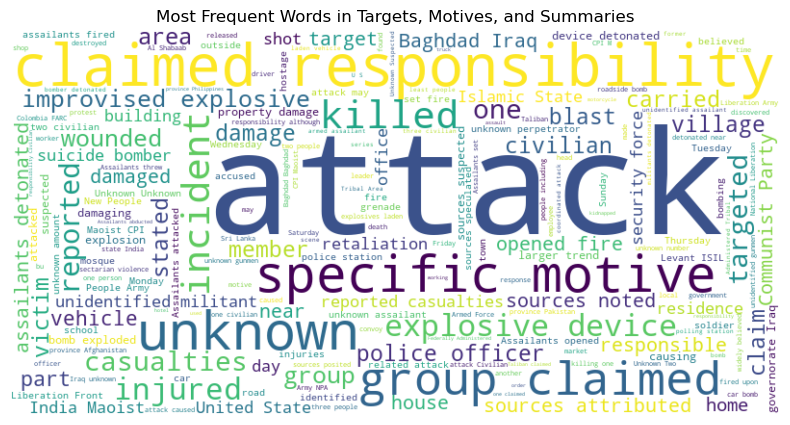

In [19]:
from wordcloud import WordCloud

# Concatenate the target, motive, and summary columns
text = data2['Target'].astype(str) + ' ' + data2['Motive'].astype(str) + ' ' + data2['Summary'].astype(str)
text = ' '.join(text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Targets, Motives, and Summaries')
plt.show()

Lastly the word cloud provides a visual representation of the most frequently mentioned words in the targets, motives, and summaries of terrorist attacks. The size and prominence of each word in the cloud reflect its frequency or importance. This plot allows you to quickly identify common themes or terms associated with the attacks, providing a concise summary of the textual data.

These plots offer different perspectives and insights into the global terrorism dataset. They help in understanding the geographical distribution of attacks, temporal trends, attack types, group hierarchy, and prominent themes. Each plot provides a unique visualization that aids in exploring and analyzing the dataset from different angles.